# PyTorch Workflow & Implementing RNN with PyTorch

Pada PyTorch terdapat 4 langkah utama untuk mengerjakan sebuah kasus machine learning, yaitu:
- Persiapan data
- Pembuatan arsitektur
- Persiapan training
- Training loop

Training loop ini digunakan karena arsitektur yang kita bangun merupakan proses RNN 1x feed forward dan 1x backpropagation, sehingga kita perlu membuat langkah perulangan untuk melakukan training dengan epoch yang banyak.

In [171]:
# import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Quick Summary
- `Pandas` adalah sebuah library Python yang digunakan untuk melakukan manipulasi dan analisis data. Library ini menyediakan struktur data yang fleksibel dan efisien untuk melakukan pemrosesan data tabular, seperti DataFrame dan Series.
- `Numpy` adalah library Python yang digunakan untuk melakukan komputasi numerik pada array multidimensional. Library ini menyediakan struktur data yang efisien untuk menyimpan dan memanipulasi data dalam bentuk array, serta berbagai fungsi matematika untuk melakukan operasi pada array tersebut.
- `Matplotlib` adalah library Python yang digunakan untuk membuat visualisasi data dalam bentuk grafik atau plot. Library ini menyediakan berbagai jenis plot, seperti line plot, bar plot, scatter plot, dan sebagainya. Library ini juga menyediakan banyak pilihan untuk mengatur tampilan plot, seperti warna, label, legend, dan sebagainya.

#### Persiapan data

Seperti biasa, di awal kita akan melakukan pembacaan dataset menggunakan pandas. Data yang akan digunakan adalah data tinggi muka air laut bulanan di Charleston. Data ini merupakan data pengukuran buoy dari tahun 1952 - 2012. Pada data ini terdapat informasi waktu pada kolom date dan pupulasi pada kolom value.

Untuk lebih lengkap silahkan mengunjungi dataset :
https://www.kaggle.com/datasets/census/population-time-series-data


In [172]:
monthly_slr = pd.read_csv("POP.csv")

In [173]:
monthly_slr

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


Informasi terkait dataset yang di gunakan
- realtime_start : waktu dilaksanakanya pengumpulan data
- value : nilai dari populasi
- date : waktu pengumpulan data
- realtime_end : waktu berakhir pengumpulan data

In [174]:
monthly_slr.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [175]:
monthly_slr.tail()

,realtime_start,value,date,realtime_end
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06
815,2019-12-06,330309.946,2019-12-01,2019-12-06


In [168]:
monthly_slr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 2019-12-06 to 2019-12-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
dtypes: float64(1)
memory usage: 12.8+ KB


In [115]:
#del monthly_slr['realtime_end']

In [116]:
#del monthly_slr['date']

In [176]:
del monthly_slr['realtime_start']

In [177]:
del monthly_slr['realtime_end']

In [178]:
monthly_slr.head()

,value,date
0,156309.0,1952-01-01
1,156527.0,1952-02-01
2,156731.0,1952-03-01
3,156943.0,1952-04-01
4,157140.0,1952-05-01


In [179]:
# set kolom waktu menjadi index
monthly_slr = monthly_slr.set_index("date")

In [180]:
monthly_slr.head()

,value
date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-01,156731.0
1952-04-01,156943.0
1952-05-01,157140.0


In [181]:
# memisahkan data train dan data test
train_df = monthly_slr[0:-120] # train 90%
test_df = monthly_slr[-120:] # test 10%

In [183]:
test_df.head()

,value
date,
2010-01-01,308833.000
2010-02-01,309027.000
2010-03-01,309212.000
2010-04-01,309191.211
2010-05-01,309369.053


In [184]:
train_df.tail()

,value
date,
2009-08-01,307685.0
2009-09-01,307946.0
2009-10-01,308189.0
2009-11-01,308418.0
2009-12-01,308633.0


In [185]:
min(train_df["value"])

156309.0

In [186]:
max(train_df["value"])

308633.0

<AxesSubplot: xlabel='date'>

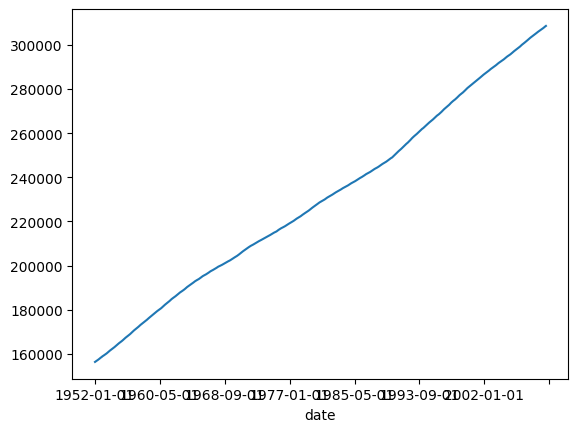

In [187]:
train_df["value"].plot()

In [126]:
from sklearn.preprocessing import StandardScaler

### Quick Summary
- `StandardScaler` adalah sebuah class atau objek dari library Scikit-learn (sklearn) yang digunakan untuk melakukan preprocessing pada data. Preprocessing data adalah proses mempersiapkan dan membersihkan data sebelum dijadikan input untuk proses machine learning.
- `StandardScaler` digunakan untuk melakukan standardisasi data numerik, yaitu mengubah data numerik menjadi data yang memiliki rata-rata 0 dan standar deviasi 1. Hal ini dilakukan untuk memperbaiki performa model machine learning, khususnya algoritma yang menggunakan jarak antar data, seperti algoritma k-nearest neighbors dan support vector machine.
- `fit_transform` adalah sebuah method dari objek transformer pada library Scikit-learn (sklearn) yang digunakan untuk melakukan preprocessing data. Method ini digunakan untuk mempelajari dan melakukan transformasi pada data secara bersamaan.
- Pada dasarnya, `fit_transform` adalah gabungan dari method fit dan transform. Method fit digunakan untuk mempelajari karakteristik data, seperti nilai rata-rata dan standar deviasi pada data numerik, sementara method transform digunakan untuk mengaplikasikan transformasi tersebut pada data.

In [127]:
# membuat object scaler
scaler = StandardScaler()

# melakukan scaling terhadap data train
train_scale = scaler.fit_transform(train_df)

# melakukan scaling terhadap data test
test_scale = scaler.transform(test_df)

In [128]:
train_scale

array([[-1.74604933e+00],
       [-1.74093743e+00],
       [-1.73615381e+00],
       [-1.73118261e+00],
       [-1.72656314e+00],
       [-1.72180298e+00],
       [-1.71687867e+00],
       [-1.71113364e+00],
       [-1.70515413e+00],
       [-1.69922151e+00],
       [-1.69582139e+00],
       [-1.68864597e+00],
       [-1.68358097e+00],
       [-1.67896150e+00],
       [-1.67476412e+00],
       [-1.66991016e+00],
       [-1.66547828e+00],
       [-1.66053053e+00],
       [-1.65518413e+00],
       [-1.64897013e+00],
       [-1.64266232e+00],
       [-1.63656556e+00],
       [-1.63082054e+00],
       [-1.62542725e+00],
       [-1.61986982e+00],
       [-1.61466412e+00],
       [-1.60969292e+00],
       [-1.60439342e+00],
       [-1.59937532e+00],
       [-1.59407583e+00],
       [-1.58854184e+00],
       [-1.58235129e+00],
       [-1.57578554e+00],
       [-1.56929015e+00],
       [-1.56319339e+00],
       [-1.55751871e+00],
       [-1.55191438e+00],
       [-1.54673213e+00],
       [-1.5

PyTorch membutuhkan data dalam bentuk tensor untuk dimasukkan ke dalam model, selain itu untuk kasus ini kita membutuhkan data dengan tipe float. Selain itu untuk proses selanjutnya, kita perlu membentuk data ke tensor 1D.

In [129]:
import torch

### Quick Summary
- `torch` adalah library Python yang digunakan untuk melakukan komputasi pada tensor, baik pada CPU maupun GPU. Tensor adalah sebuah struktur data multidimensional yang mirip dengan array pada NumPy, namun dapat dioperasikan pada GPU untuk mempercepat komputasi pada model machine learning.
- Library `torch` sangat populer di kalangan peneliti dan praktisi machine learning karena kecepatannya dalam melakukan komputasi pada tensor, serta dukungannya terhadap komputasi pada GPU.

In [130]:
# merubah data ke bentuk tensor lalu reshape ke bentuk view(-1)
train_tensor = torch.FloatTensor(train_scale).view(-1)
test_tensor = torch.FloatTensor(test_scale).view(-1)

### Quick Summary
- `FloatTensor` adalah sebuah class dari library PyTorch yang digunakan untuk membuat tensor dengan tipe data float. Class ini merupakan turunan dari class torch.Tensor yang digunakan untuk membuat tensor dengan tipe data numerik.
- `Tensor` adalah sebuah struktur data multidimensional yang mirip dengan array pada NumPy, namun dapat dioperasikan pada GPU untuk mempercepat komputasi pada model machine learning. Tensor float pada PyTorch biasanya digunakan untuk menyimpan bobot dan nilai output pada model machine learning.

In [131]:
train_tensor

tensor([-1.7460e+00, -1.7409e+00, -1.7362e+00, -1.7312e+00, -1.7266e+00,
        -1.7218e+00, -1.7169e+00, -1.7111e+00, -1.7052e+00, -1.6992e+00,
        -1.6958e+00, -1.6886e+00, -1.6836e+00, -1.6790e+00, -1.6748e+00,
        -1.6699e+00, -1.6655e+00, -1.6605e+00, -1.6552e+00, -1.6490e+00,
        -1.6427e+00, -1.6366e+00, -1.6308e+00, -1.6254e+00, -1.6199e+00,
        -1.6147e+00, -1.6097e+00, -1.6044e+00, -1.5994e+00, -1.5941e+00,
        -1.5885e+00, -1.5824e+00, -1.5758e+00, -1.5693e+00, -1.5632e+00,
        -1.5575e+00, -1.5519e+00, -1.5467e+00, -1.5418e+00, -1.5364e+00,
        -1.5314e+00, -1.5260e+00, -1.5204e+00, -1.5143e+00, -1.5077e+00,
        -1.5011e+00, -1.4948e+00, -1.4890e+00, -1.4833e+00, -1.4779e+00,
        -1.4724e+00, -1.4667e+00, -1.4617e+00, -1.4565e+00, -1.4507e+00,
        -1.4440e+00, -1.4370e+00, -1.4302e+00, -1.4235e+00, -1.4176e+00,
        -1.4116e+00, -1.4061e+00, -1.4009e+00, -1.3952e+00, -1.3898e+00,
        -1.3842e+00, -1.3785e+00, -1.3721e+00, -1.3

In [132]:
train_tensor[:20]

tensor([-1.7460, -1.7409, -1.7362, -1.7312, -1.7266, -1.7218, -1.7169, -1.7111,
        -1.7052, -1.6992, -1.6958, -1.6886, -1.6836, -1.6790, -1.6748, -1.6699,
        -1.6655, -1.6605, -1.6552, -1.6490])

Karena RNN memanfaatkan informasi sequential dari data kita, kita perlu memecah bentuknya menjadi kelompok-kelompok data. Hal ini akan kita lakukan menggunakan fungsi custom di bawah ini. 

In [133]:
# function for making sequential data
def input_data(data, seq_size):
    out = []
    length = len(data)
    
    for i in range(length-seq_size):
        feature = data[i : i+seq_size]
        target = data[i+seq_size : i+seq_size+1]
        out.append((feature, target))
    
    return out

Jika dianalogikan sederhana, maka bentuk yang kita harapkan adalah seperti berikut:

In [134]:
# sebagai input di fungsi input_data
seq_size = 12

# apply fungsi custom ke data train dan test
train_dataset = input_data(train_tensor, seq_size)
test_dataset = input_data(test_tensor, seq_size)

In [135]:
train_dataset[:2]

[(tensor([-1.7460, -1.7409, -1.7362, -1.7312, -1.7266, -1.7218, -1.7169, -1.7111,
          -1.7052, -1.6992, -1.6958, -1.6886]),
  tensor([-1.6836])),
 (tensor([-1.7409, -1.7362, -1.7312, -1.7266, -1.7218, -1.7169, -1.7111, -1.7052,
          -1.6992, -1.6958, -1.6886, -1.6836]),
  tensor([-1.6790]))]

Dari proses di atas, kita telah membuat data dengan bentuk feature dan label/target secara berpasangan. Data ini akan kita jadikan bentuk DataLoader yang nantinya akan menjadi input dari model PyTorch kita. Pada kasus ini ada beberapa parameter DataLoader yang harus kita tentukan:

- dataset: data yang sudah diproses sebelumnya, dapat juga berupa PyTorch Dataset
- batch_size: ukuran minibatch yang ingin digunakan
- shuffle: pastikan bernilai False karena kasus time series

In [136]:
from torch.utils.data import DataLoader

### Quick Summary
- `DataLoader` adalah sebuah class dari library PyTorch yang digunakan untuk memuat data dalam batch pada saat pelatihan model machine learning. Class ini memudahkan proses memuat dan memproses data secara otomatis dalam batch, sehingga mempercepat proses pelatihan model.
- `DataLoader` biasanya digunakan bersamaan dengan class Dataset dari PyTorch, yang digunakan untuk menampung data. Class Dataset memungkinkan kita untuk mengakses data secara mudah dan fleksibel, serta dapat melakukan transformasi data seperti augmentasi gambar, normalisasi, dan sebagainya.

In [137]:
# setting batch size
bs = 9

# buat DataLoader untuk data train dan test
train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=False)

In [138]:
train_loader.dataset[0]

(tensor([-1.7460, -1.7409, -1.7362, -1.7312, -1.7266, -1.7218, -1.7169, -1.7111,
         -1.7052, -1.6992, -1.6958, -1.6886]),
 tensor([-1.6836]))

Langkah-langkah persiapan data di PyTorch pada kasus ini:
- siapkan data time series
- bersihkan data dan dibuat berurutan
- pisahkan data train dan data test
- lakukan scaling menggunakan informasi dari data train
- ubah ke bentuk tensor
- buat PyTorch Dataset
- buat PyTorch DataLoader

#### Pembuatan Arsitektur

Data yang akan digunakan pada model sudah selesai dibentuk, sekarang saatnya kita membangun arsitektur pada RNN yang akan digunakan. Pada bagian ini kita akan membangun class dengan nama RNN yang isinya mengambil beberapa informasi dari module yang disediakan PyTorch. Module ini dapat diakses melalui `nn.Module`. Oleh karena itu kita panggil `nn` dahulu menggunakan syntax di bawah ini.

In [139]:
from torch import nn

In [140]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super().__init__()
        self.rnn = nn.RNN(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = num_layers
        ) # RNN block
        self.fc = nn.Linear(
            in_features = hidden_size,
            out_features = output_size
        ) # fully connected layer
        
    def forward(self, x, hidden): # langkah feedforward
        x, hidden = self.rnn(x, hidden)
        x = self.fc(x)
        
        return x, hidden

#### Persiapan training

Dari class yang sudah dibentuk, terdapat beberapa input yang harus dimasukkan. Agar input terdokumentasi dengan baik maka sebaiknya kita simpan konfigurasinya ke dalam sebuah dictionary.

### Quick Summary
- `seq_size` dapat merujuk pada ukuran panjang (length) dari sebuah sequence (urutan) data. Istilah ini seringkali digunakan dalam konteks pengolahan bahasa alami (natural language processing) atau pemrosesan sequence data lainnya seperti dalam jaringan saraf rekursif (RNN), di mana data masukan dianggap sebagai sequence atau urutan data.

In [141]:
seq_size

12

In [142]:
config = {
    "input_size": seq_size, 
    "output_size": 1, 
    "hidden_size": 64, 
    "num_layers": 2
}

Setelah menyiapkan konfigurasi, kita akan memasukkan setting yang sudah dilakukan ke dalam model.

In [143]:
# kunci randomness awal
torch.manual_seed(2102)

# buat model dan masukan konfigurasi
model = RNN(
    input_size = config["input_size"], 
    output_size = config["output_size"], 
    hidden_size = config["hidden_size"], 
    num_layers = config["num_layers"]
)

Sifat model RNN sama seperti model Neural Network biasa, yaitu setelah model melakukan feedforward maka perlu dihitung loss-nya. Pada bagian ini kita akan menentukan perhitungan loss yang digunakan adalah `MSELoss()` dari `nn` yang merupakan perhitungan **Mean Squared Error** karena data target kita berupa angka. Dokumentasi lengkap terkait loss function pada PyTorch dapat dilihat melalui [link ini](https://pytorch.org/docs/stable/nn.html#loss-functions).

In [144]:
criterion = nn.MSELoss()

Setelah menentukan loss function yang digunakan, kita akan melakukan setting backpropagation dengan metode Stochastic Gradient Descent yang merupakan lanjutan dari metode Gradient Descent normal. Method untuk melakukkan setting ini terdapat pada module `optim` dari `torch`. Untuk mengakses optimizer Stochastic Gradient Descent kita akan menggunakan `optim.SGD()` dimana paramter yang perlu dimasukkan yaitu:
- `params`: parameter pada model, lebih mudahnya kita tinggal menuliskan `model.parameters()` yaitu mengambil nilai yang sudah kita siapkan di atas
- `lr`: learning rate

In [145]:
from torch import optim

### Quick Summary
- `optim` adalah sebuah modul dalam library PyTorch yang menyediakan implementasi berbagai algoritma optimasi untuk digunakan dalam pelatihan model machine learning. Modul optim menyediakan implementasi dari berbagai algoritma optimasi populer, seperti stochastic gradient descent (SGD), Adam, RMSprop, dan sebagainya.
- `optim.SGD` adalah salah satu algoritma optimasi yang disediakan oleh modul optim dalam library PyTorch. SGD adalah singkatan dari Stochastic Gradient Descent, yang merupakan salah satu algoritma optimasi paling sederhana dan paling populer yang digunakan dalam pelatihan model machine learning.

In [146]:
optimizer = optim.SGD(params = model.parameters(), lr = 0.002)

In [147]:
model.parameters

<bound method Module.parameters of RNN(
  (rnn): RNN(12, 64, num_layers=2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)>

#### Training and Evaluation Loop

Jika dilihat pada proses pembuatan model, kita tidak menentukan epoch atau jumlah iterasi yang kita inginkan padahal kasus Neural Network bergantung pada jumlah iterasi. Hal ini karena pada PyTorch kita harus menentukan sendiri fungsi looping untuk proses training maupun evaluasinya.


In [148]:
train_loader.dataset[0]

(tensor([-1.7460, -1.7409, -1.7362, -1.7312, -1.7266, -1.7218, -1.7169, -1.7111,
         -1.7052, -1.6992, -1.6958, -1.6886]),
 tensor([-1.6836]))

In [149]:
device = "gpu" if torch.cuda.is_available() else "cpu"

In [150]:
device

'cpu'

In [151]:
epochs = 30
train_cost, test_cost = [], []

for i in range(epochs):
    # training
    model.train()
    cost = 0
    for feature, target in train_loader: # iterasi untuk minibatch
        # feedforward
        output, hidden = model.forward(feature, None)
        # hitung loss
        loss = criterion(output, target)
        # backpropagation
        loss.backward()
        # update weight
        optimizer.step()
        # reset optimizer (kasus khusus pada pytorch)
        optimizer.zero_grad()
        
        # perhitungan loss total per minibatch (dikali jumlah data agar bisa dibagi dengan total data di akhir)
        cost += loss.item() * feature.shape[0] 
        # .item() buat ambil skalar nilai 
    train_cost.append(cost / len(train_dataset)) # cost (MSE) per epoch dicatat
    
    # evaluasi
    with torch.no_grad(): # memastikan tidak terjadi perhitungan gradient
        model.eval()
        cost = 0
        for feature, target in test_loader:
            # feedforward
            output, hidden = model.forward(feature, None)
            # hitung loss sebagai pembanding
            loss = criterion(output, target)
            # data test ga backpropagation dan update weight nanti leakage
            
            # perhitungan loss total per minibatch (dikali jumlah data agar bisa dibagi dengan rata2)
            cost += loss.item() * feature.shape[0]
        test_cost.append(cost / len(test_dataset)) # cost (MSE) per epoch dicatat

    print(f'\rEpoch: {i+1}/{epochs} | train_cost: {train_cost[-1]:4f} | test_cost: {test_cost[-1]:4f}', end=' ')

Epoch: 30/30 | train_cost: 0.002806 | test_cost: 0.054771 

Setelah training selesai, kita dapat melihat hasil evaluasi dengan melakukan plot loss data train dengan data test.

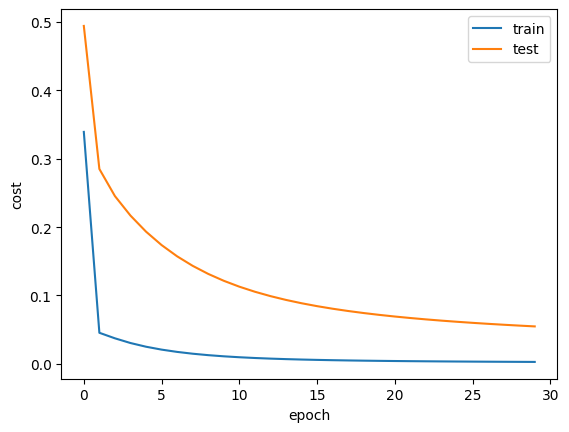

In [152]:
plt.plot(train_cost, label = "train")
plt.plot(test_cost, label = "test")

plt.xlabel("epoch")
plt.ylabel("cost")
plt.legend()

#### Prediction/Forecast

Dari hasil training, kita akan melakukan prediksi untuk waktu yang akan datang.

In [153]:
test_loader.dataset[-1]

(tensor([2.2874, 2.2909, 2.2943, 2.2974, 2.3008, 2.3045, 2.3084, 2.3127, 2.3173,
         2.3218, 2.3264, 2.3305]),
 tensor([2.3341]))

In [154]:
1080%7

2

In [155]:
preds, targets = [], []
hidden = None
last_inputs = None

month = 120 # jumlah bulan yang akan diprediksi

with torch.no_grad():
    model.eval() 
    for inputs, target in test_loader: 
        output, hidden = model(inputs, hidden)
        preds += output.flatten().tolist()
        targets += target.flatten().tolist()
        last_inputs = inputs

    n_forecast = int(np.ceil(month/len(last_inputs))) # karena menggunakan minibatch, maka jumlah iterasi menyesuaikan

    for i in range(int(n_forecast)):
        # take last prediction result for new input
        pred_inputs = (last_inputs[-1][1:]).tolist()
        pred_inputs.append(preds[-1])
        
        # create new input format for models
        forecast_inputs = last_inputs[1:].tolist()
        forecast_inputs.append(pred_inputs)
        forecast_inputs = torch.tensor(forecast_inputs)
        
        # forecast and saving the result
        output, hidden = model(forecast_inputs, hidden)
        last_inputs = forecast_inputs
        preds += output.flatten().tolist()

# inverse the result since we use scaling on our data
preds = scaler.inverse_transform(pd.DataFrame(preds))
targets = scaler.inverse_transform(pd.DataFrame(targets))

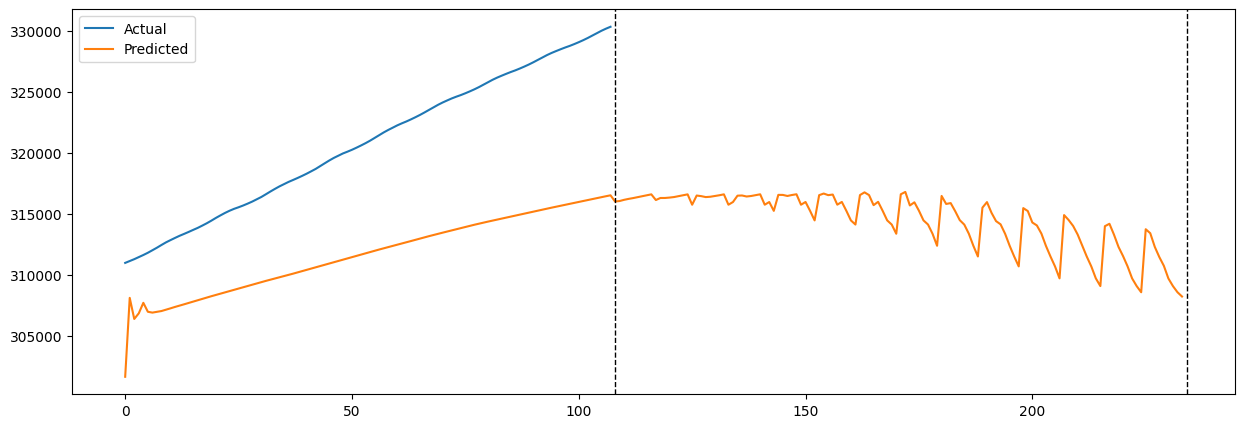

In [156]:
# Plot the predicted and actual values
plt.figure(figsize=(15,5))
plt.plot(targets, label='Actual')
plt.plot(preds, label='Predicted')

plt.axvline(len(test_dataset), color='k', linestyle="--", linewidth=1)
plt.axvline(len(test_dataset) + n_forecast*len(last_inputs), color='k', linestyle="--", linewidth=1)

plt.legend()
plt.show()

#### Save Model

Pada model deep learning, informasi yang akan disimpan ke dalam model adalah weight dari hidden layer pada epoch terakhir. Informasi weight ini dapat dilihat menggunakan method `.state_dict()` pada model kita. Setelah itu kita save menggunakan `torch.save()`.

In [157]:
model.state_dict()

OrderedDict([('rnn.weight_ih_l0',
              tensor([[ 0.0437,  0.0939, -0.0163,  0.1199, -0.0208,  0.1206, -0.1029, -0.1185,
                        0.0125,  0.0994,  0.0745, -0.0343],
                      [ 0.0615,  0.1224,  0.0651,  0.1121,  0.0006,  0.0252,  0.0116,  0.0077,
                        0.0129,  0.0362,  0.1144, -0.0868],
                      [-0.0332,  0.0731, -0.1189,  0.0233,  0.0058, -0.0914, -0.0394,  0.0277,
                        0.0073,  0.1179,  0.0153,  0.0913],
                      [ 0.1048, -0.0939,  0.0244,  0.1268, -0.0831, -0.0134,  0.0625,  0.0405,
                        0.0811, -0.1063, -0.0794,  0.0566],
                      [ 0.0129, -0.0312, -0.0199,  0.0215, -0.0271, -0.0828, -0.0047,  0.0351,
                        0.0486,  0.0502, -0.0114, -0.0592],
                      [ 0.0040, -0.0464, -0.0884, -0.0749,  0.0458,  0.0635, -0.0632, -0.0004,
                       -0.0211,  0.0750, -0.1084, -0.0078],
                      [-0.0297, -0.0

In [158]:
import os
os.makedirs("model", exist_ok=True) # membuat folder model

### Quick Summary
- `os` adalah sebuah library Python yang digunakan untuk berinteraksi dengan sistem operasi yang digunakan pada komputer. Library ini menyediakan fungsi dan method untuk mengakses direktori, mengelola file, menjalankan perintah shell, dan sebagainya.
- `os.makedirs` adalah sebuah fungsi dari library Python os yang digunakan untuk membuat direktori secara rekursif. Artinya, jika direktori yang ingin dibuat memiliki direktori induk yang belum ada, maka fungsi os.makedirs akan membuat direktori induk tersebut terlebih dahulu sebelum membuat direktori yang diinginkan.
- `torch.save` adalah sebuah fungsi dari library PyTorch yang digunakan untuk menyimpan model machine learning yang telah dilatih ke dalam sebuah file. Fungsi ini berguna untuk menyimpan hasil pelatihan model sehingga kita dapat menggunakannya kembali tanpa perlu melakukan pelatihan ulang.
- `config` adalah kependekan dari konfigurasi, yang pada dasarnya berarti pengaturan atau setting dalam suatu sistem. Dalam konteks pengembangan perangkat lunak, config sering digunakan untuk menyimpan pengaturan yang digunakan dalam suatu aplikasi atau sistem.

In [159]:
torch.save(model.state_dict(), "model/rnn_weight.pth")

Selain weight, informasi yang biasa disimpan adalah configuration dari model kita. Sama seperti sebelumnya kita bisa menggunakan `torch.save()` untuk variable `config`.

In [160]:
torch.save(config, "model/rnn_config.pth")

In [161]:
config

{'input_size': 12, 'output_size': 1, 'hidden_size': 64, 'num_layers': 2}

#### Load Model

Pada bagian ini kita akan melakukan load model yang sudah disimpan tadi. Sebagai catatan, load model dapat dilakukan asalkan arsitektur model kita buat serupa.

In [162]:
# ambil arsitektur yang telah dibuat
class RNN_Load(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super().__init__()
        self.rnn = nn.RNN(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = num_layers
        ) # RNN block
        self.fc = nn.Linear(
            in_features = hidden_size,
            out_features = output_size
        ) # fully connected layer
        
    def forward(self, x, hidden): # langkah feedforward
        x, hidden = self.rnn(x, hidden)
        x = self.fc(x)
        
        return x, hidden

Load configuration serta weight dari file dapat menggunakan `torch.load()` lalu kita simpan ke dalam sebuah variable.

In [163]:
config_load = torch.load("model/rnn_config.pth")
weight_load = torch.load("model/rnn_weight.pth")

In [164]:
config_load

{'input_size': 12, 'output_size': 1, 'hidden_size': 64, 'num_layers': 2}

Load configuration kita masukkan secara manual, yaitu dengan mengambil value pada dictionary di object `weight_load`. Sementara untuk load weight, kita dapat menggunakan method `.load_state_dict()` pada model kita.

In [165]:
model_2 = RNN_Load(
    input_size = config_load["input_size"], 
    output_size = config_load["output_size"], 
    hidden_size = config_load["hidden_size"], 
    num_layers = config_load["num_layers"]    
)

In [166]:
model_2.load_state_dict(weight_load)

<All keys matched successfully>

In [167]:
preds, targets = [], []
hidden = None
last_inputs = None

month = 120 # jumlah bulan yang akan diprediksi

with torch.no_grad():
    model_2.eval() 
    for inputs, target in test_loader: 
        output, hidden = model_2(inputs, hidden)
        preds += output.flatten().tolist()
        targets += target.flatten().tolist()
        last_inputs = inputs

    n_forecast = int(np.ceil(month/len(last_inputs))) # karena menggunakan minibatch, maka jumlah iterasi menyesuaikan

    for i in range(int(n_forecast)):
        # take last prediction result for new input
        pred_inputs = (last_inputs[-1][1:]).tolist()
        pred_inputs.append(preds[-1])
        
        # create new input format for models
        forecast_inputs = last_inputs[1:].tolist()
        forecast_inputs.append(pred_inputs)
        forecast_inputs = torch.tensor(forecast_inputs)
        
        # forecast and saving the result
        output, hidden = model_2(forecast_inputs, hidden)
        last_inputs = forecast_inputs
        preds += output.flatten().tolist()

# inverse the result since we use scaling on our data
preds = scaler.inverse_transform(pd.DataFrame(preds))
targets = scaler.inverse_transform(pd.DataFrame(targets))

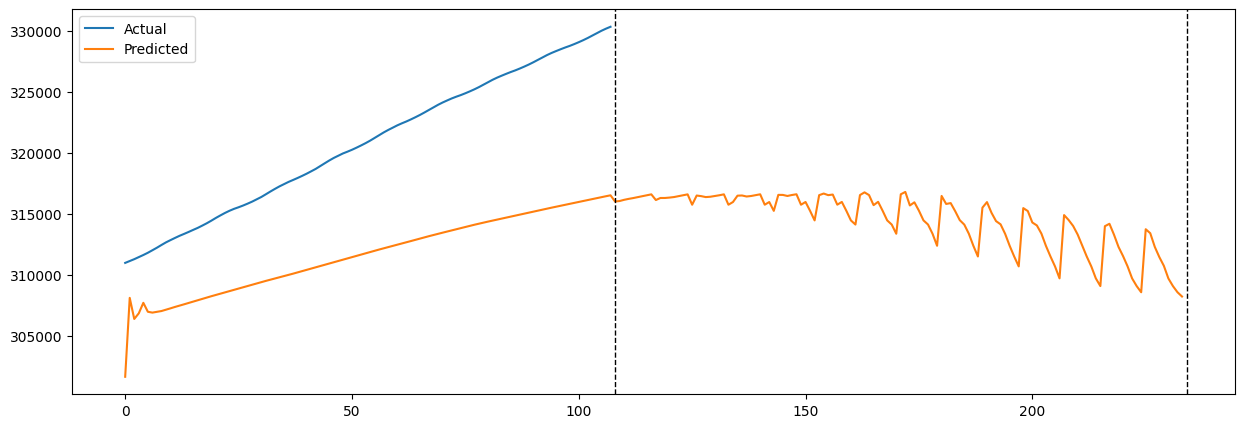

In [101]:
# Plot the predicted and actual values
plt.figure(figsize=(15,5))
plt.plot(targets, label='Actual')
plt.plot(preds, label='Predicted')

plt.axvline(len(test_dataset), color='k', linestyle="--", linewidth=1)
plt.axvline(len(test_dataset) + n_forecast*len(last_inputs), color='k', linestyle="--", linewidth=1)

plt.legend()
plt.show()